<a href="https://colab.research.google.com/github/Vishwanath-Ayyappan/ECE-GY-6123-Image-and-Video-Processing/blob/main/Chidambaram_Ayyappan_CA02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Assignment 2


## Problem 1

Implementing 2D Convolution using Python

First, Lets start by importing some necessry libraries.

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import scipy.signal as sig

Next, conv2 is a manual function written in python which implements same padding convolution. Also, assuming the filter has odd length in both vertical and horizontal directions and the pixel values outside the image are zero.

The output convolved image is obtained by sliding the flipped version of the kernel over the zero padded image.

In [27]:
def conv2(img,kernel):
    # First, start by doing zero padding
    x = int(kernel.shape[1]/2) 
    y = int(kernel.shape[0]/2)
    # Padding across rows and columns
    col_pad = np.zeros((img.shape[0],x))
    row_pad = np.zeros((y,img.shape[1]+(2*x)))
    img_padded = np.hstack((col_pad,img))
    img_padded = np.hstack((img_padded,col_pad))
    img_padded = np.vstack((row_pad,img_padded))
    img_padded = np.vstack((img_padded,row_pad))
    # Next, flip the kernel filter
    kernel = np.fliplr(kernel)
    kernel = np.flipud(kernel)
    img_conv = np.zeros([img.shape[0],img.shape[1]])
    img_conv = img_conv.astype(float) 
    # Convolution process
    for i in range (y, y+img.shape[0]):
        for j in range (x, x+img.shape[1]):
            img_conv[i-y,j-x] = np.sum(kernel*img_padded[i-y:i+y+1, j-x:j+x+1])
    return img_conv

In [28]:
def plot_filtering(img,KERNEL):
    # Uses the above convolution function for the given image and filter
    img_output = conv2(img,KERNEL)
    # Normalizing the input between 0 and 1
    img_output = (img_output-np.min(img_output))/(np.max(img_output)-np.min(img_output))
    image_name = "output_image" + ".jpg"
    cv2.imwrite(image_name,img_output*255)
    # Plotting original and filtered image
    e,flt = plt.subplots(1,2,figsize=(25,25))
    flt[0].imshow(img,cmap='gray')
    flt[1].imshow(img_output,cmap='gray')
    plt.title('Original image and Filtered image')
    # Log-magnitude spectrum of the Original Image
    fft_original = np.absolute(np.fft.fftshift(np.fft.fft2(img)))
    fft_original_lg = 20*np.log(fft_original+1)
    ## Log-magnitude spectrum of the Convolved Image
    fft_output = np.absolute(np.fft.fftshift(np.fft.fft2(img_output)))
    fft_output_lg = 20*np.log(fft_output+1)
    # Log-magnitude spectrum of the Kernel Filter
    fft_filt = np.absolute(np.fft.fftshift(np.fft.fft2(KERNEL, s=[img.shape[0], img.shape[1]])))   # Hint: you should use FFT size equal to the image size for easy comparison
    fft_filt_lg = 20*np.log(fft_filt+1)
    # Plotting all of the FFT's
    f,ax = plt.subplots(1,3,figsize=(15,15))
    ax[0].imshow(fft_original_lg,cmap='gray') 
    ax[1].imshow(fft_output_lg,cmap='gray')
    ax[2].imshow(fft_filt_lg,cmap='gray')
    plt.title('Log-Magnitude Spectrum of the Original, Convolved Image and kernel')

In [29]:
file_name = 'persons.jpg'
img = cv2.imread(file_name,0)  
img = img.astype(float)
print(img.shape)
# plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

(360, 640)


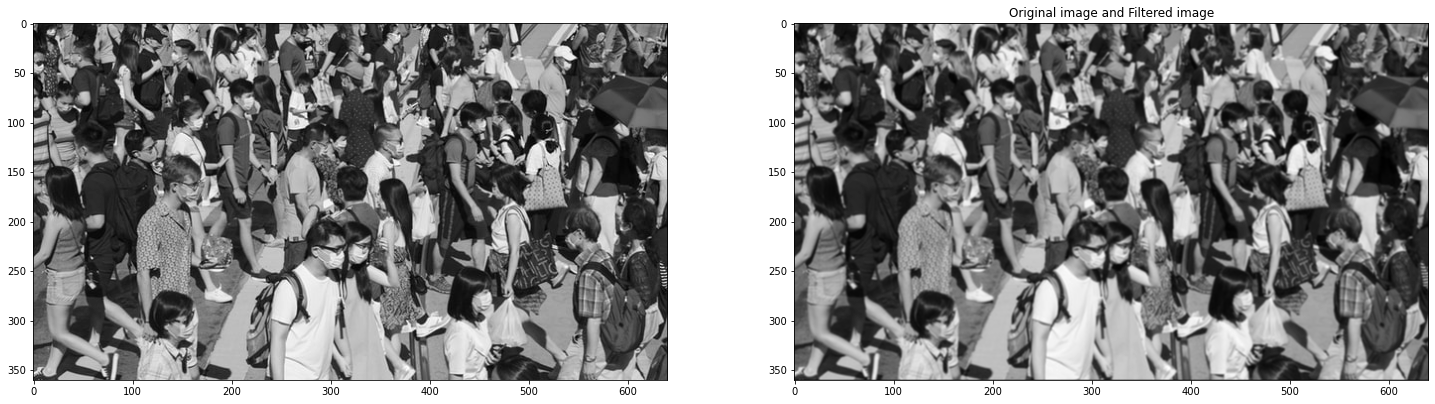

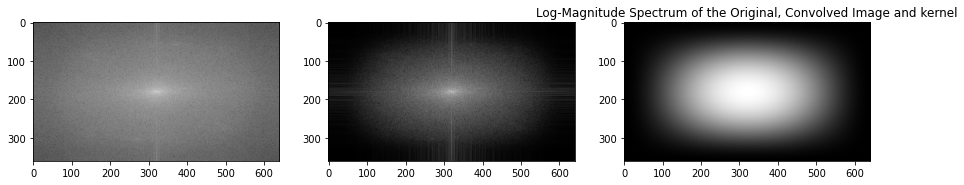

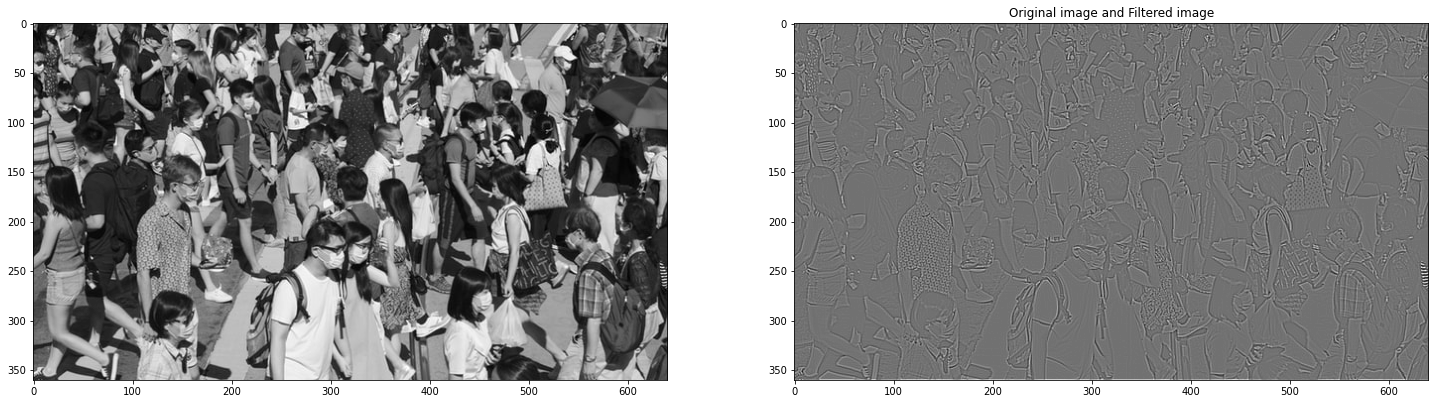

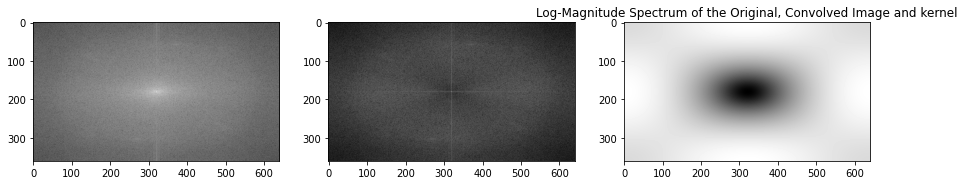

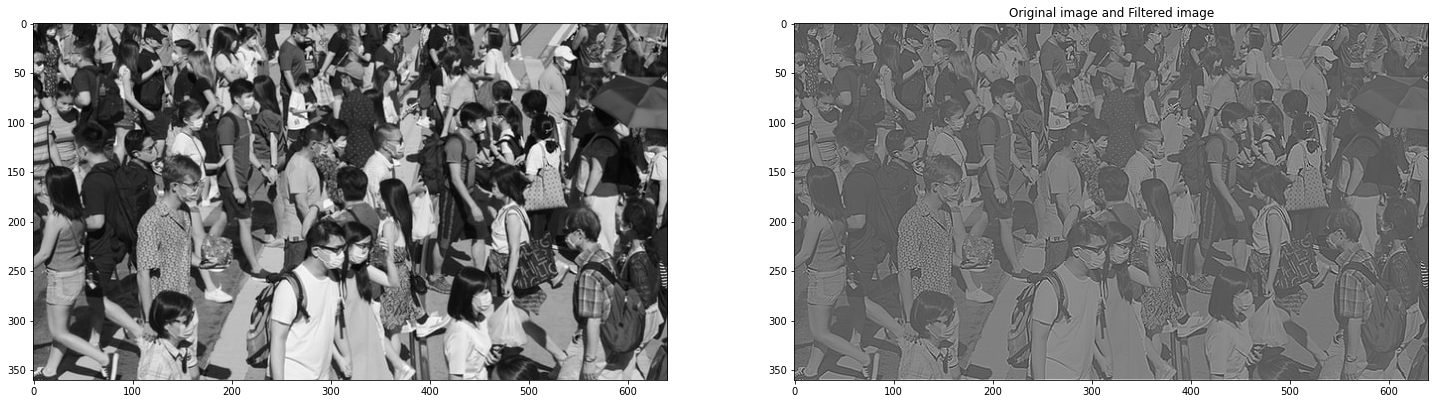

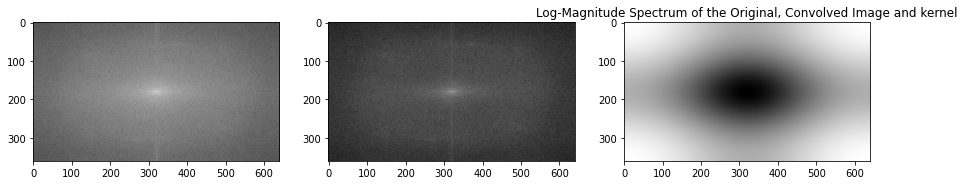

In [30]:
H1 = np.array([[1,2,1],[2,4,2],[1,2,1]])/16 
H2 = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]) 
H3 = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
Kernels = [H1,H2,H3]
for k in Kernels:
    plot_filtering(img,k)

*   H1 is a low pass fiter, hence it reduces high frequency information, thus blurring the image
*   H2 and H3 are high pass filters, thus increases the contrast between bright and dark pixel to produce a sharpen image. It loses low frequency information but has more and clearer edges.
 The difference between H2 and H3 is that H2 balances edges from all direction, but H3 loses edges from both horizontal and vertical directions.


## Problem 2

Image Denoising

In [31]:
def awgn(img,sigma):
    # Creating a zero mean gaussian noise same as the size of the image with sigma for noise levels
    random_noise = np.random.normal(0,sigma,img.shape)*255
    noisy_img = img + random_noise
    return noisy_img

In [32]:
def gaussian_filter(std_dev,kern_size):
    filter_dim =  kern_size
    gauss_filter = np.zeros((filter_dim,filter_dim))
    m = int(np.floor(filter_dim / 2))
    n = int(np.floor(filter_dim / 2))
    sum1 =0
    for x in range(-m,m):
        for y in range(-n,n):
            gauss_filter[x+m,y+n]=(1/(2*np.pi*std_dev**2))*np.exp(-(x**2 + y**2)/(2*std_dev**2))
    gauss_filter /= gauss_filter.sum()
    return gauss_filter

In [33]:
def plotimages(img_o, img_n, img_avg1, img_avg2, img_gaus1, img_gaus2, sigma):
    
    f,ax = plt.subplots(3,2,figsize = (15,15))
    ax[0,0].imshow(img_o,cmap='gray')
    ax[0,0].set_title('Original image')
    ax[0,1].imshow(img_n,cmap='gray')
    ax[0,1].set_title('Noisy Image. sigma = '+ str(sigma))
    ax[1,0].imshow(img_avg1,cmap='gray')
    ax[1,1].imshow(img_avg2,cmap='gray')
    ax[2,0].imshow(img_gaus1,cmap='gray')
    ax[2,1].imshow(img_gaus2,cmap='gray')
    ax[1,0].set_title('Filtered with Average Filter 5x5')
    ax[1,1].set_title('Filtered with Average Filter 7x7')
    ax[2,0].set_title('Filtered with Gaussian Filter 5x5')
    ax[2,1].set_title('Filtered with Gaussian Filter 7x7')
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.show()

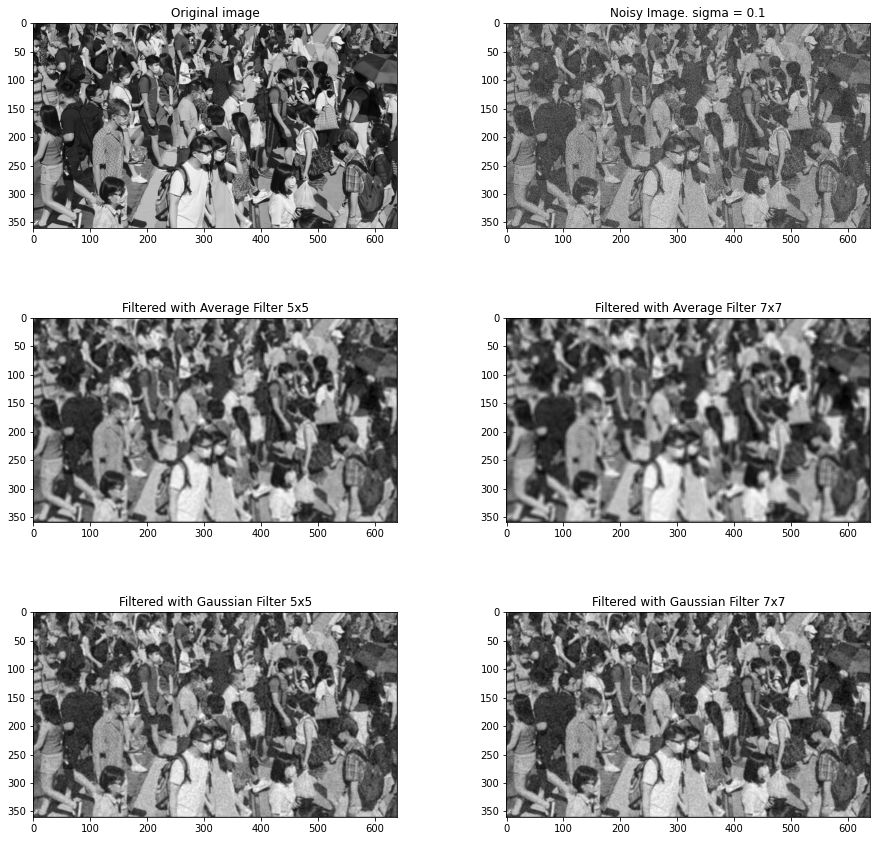

PSNR of Average Kernel of size 5X5 =21.00615275949444
PSNR of Average Kernel of size 7X7 =19.421123360634617
PSNR of Gaussian Kernel of size 5X5 =24.251611291123808
PSNR of Gaussian Kernel of size 7X7 =24.251611291123808


In [34]:
img1 = awgn(img,0.1)
img2 = awgn(img,0.8)

avg_filt_5x5 = np.ones((5,5))/25
avg_filt_7x7 = np.ones((7,7))/49
gauss_filt_5x5  = gaussian_filter(1,5)
gauss_filt_7x7  = gaussian_filter(1,7)

out_img_avg_5x5 = sig.convolve2d(img1,avg_filt_5x5,mode='same')
out_img_avg_7x7 = sig.convolve2d(img1,avg_filt_7x7,mode='same')
out_img_gauss_5x5 = sig.convolve2d(img1,gauss_filt_5x5,mode='same')
out_img_gauss_7x7 = sig.convolve2d(img1,gauss_filt_5x5,mode='same')

plotimages(img, img1, out_img_avg_5x5, out_img_avg_7x7, out_img_gauss_5x5, out_img_gauss_7x7, 0.1)

PSNR_avg_5x5 = 10*np.log10(255**2/np.square(np.subtract(img,out_img_avg_5x5)).mean())
print('PSNR of Average Kernel of size 5X5 ='+str(PSNR_avg_5x5))
PSNR_avg_7x7 = 10*np.log10(255**2/np.square(np.subtract(img,out_img_avg_7x7)).mean())
print('PSNR of Average Kernel of size 7X7 ='+str(PSNR_avg_7x7))
PSNR_gauss_5x5 = 10*np.log10(255**2/np.square(np.subtract(img,out_img_gauss_5x5)).mean())
print('PSNR of Gaussian Kernel of size 5X5 ='+str(PSNR_gauss_5x5))
PSNR_gauss_7x7 = 10*np.log10(255**2/np.square(np.subtract(img,out_img_gauss_7x7)).mean())
print('PSNR of Gaussian Kernel of size 7X7 ='+str(PSNR_gauss_7x7))

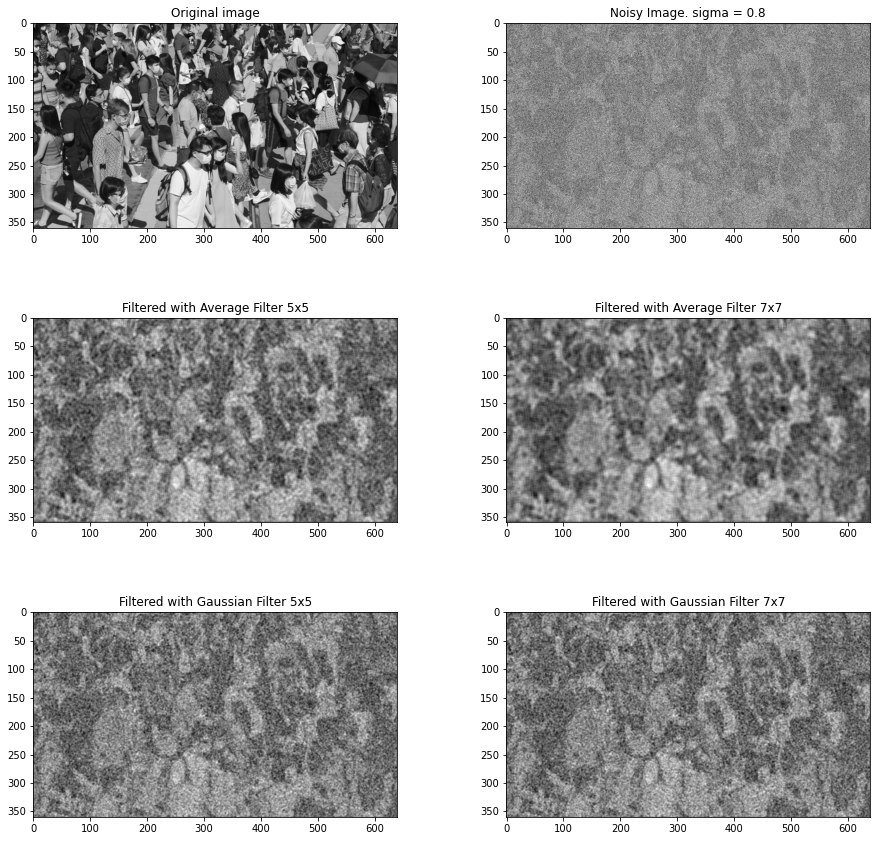

PSNR of Average Kernel of size 5X5 =14.805206574355218
PSNR of Average Kernel of size 7X7 =16.175946786061637
PSNR of Gaussian Kernel of size 5X5 =11.69628535439527
PSNR of Gaussian Kernel of size 7X7 =11.69628535439527


In [35]:
out_img_avg_5x5_2 = sig.convolve2d(img2,avg_filt_5x5,mode='same')
out_img_avg_7x7_2 = sig.convolve2d(img2,avg_filt_7x7,mode='same')
out_img_gauss_5x5_2 = sig.convolve2d(img2,gauss_filt_5x5,mode='same')
out_img_gauss_7x7_2 = sig.convolve2d(img2,gauss_filt_5x5,mode='same')

plotimages(img, img2, out_img_avg_5x5_2, out_img_avg_7x7_2, out_img_gauss_5x5_2, out_img_gauss_7x7_2, 0.8)

PSNR_avg_5x5 = 10*np.log10(255**2/np.square(np.subtract(img,out_img_avg_5x5_2)).mean())
print('PSNR of Average Kernel of size 5X5 ='+str(PSNR_avg_5x5))
PSNR_avg_7x7 = 10*np.log10(255**2/np.square(np.subtract(img,out_img_avg_7x7_2)).mean())
print('PSNR of Average Kernel of size 7X7 ='+str(PSNR_avg_7x7))
PSNR_gauss_5x5 = 10*np.log10(255**2/np.square(np.subtract(img,out_img_gauss_5x5_2)).mean())
print('PSNR of Gaussian Kernel of size 5X5 ='+str(PSNR_gauss_5x5))
PSNR_gauss_7x7 = 10*np.log10(255**2/np.square(np.subtract(img,out_img_gauss_7x7_2)).mean())
print('PSNR of Gaussian Kernel of size 7X7 ='+str(PSNR_gauss_7x7))

1. Averaging filter denoise the image better but blurs the image.
2. Gaussian filter denoise the image but do not blur extensively.

Signal to noise ratio is much better for gaussian filters
For sigma = 0.01, Gaussian 5x5 works best and for 0.1, Gaussian 7x7 works best